In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Data Pre-Processing of Diabetes Dataset

In [3]:
Diabetes_Data = pd.read_csv('https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/diabetes.csv')
Diabetes_Data.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [4]:
Diabetes_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1009 non-null   int64  
 1   No_Pation  1009 non-null   int64  
 2   Gender     1006 non-null   object 
 3   AGE        1008 non-null   float64
 4   Urea       1008 non-null   float64
 5   Cr         1007 non-null   float64
 6   HbA1c      1006 non-null   float64
 7   Chol       1007 non-null   float64
 8   TG         1007 non-null   float64
 9   HDL        1008 non-null   float64
 10  LDL        1007 non-null   float64
 11  VLDL       1008 non-null   float64
 12  BMI        1009 non-null   float64
 13  CLASS      1009 non-null   object 
dtypes: float64(10), int64(2), object(2)
memory usage: 110.5+ KB


1.	Data Cleaning

In [5]:
Diabetes_renamed_data = Diabetes_Data.rename(columns= {'ID': 'Visit_ID', 'No_Pation': 'Patient_ID' }, inplace= False)
Diabetes_renamed_data

,Visit_ID,Patient_ID,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,194,454316,F,57.0,4.1,70.0,9.3,5.3,3.3,1.0,1.4,1.3,29.0,Y
1005,195,4543,f,55.0,4.1,34.0,13.9,5.4,1.6,1.6,3.1,0.7,33.0,Y
1006,249,48822,M,55.0,4.2,57.0,8.9,5.3,3.1,0.7,3.3,1.4,27.0,Y
1007,88,21747,M,41.0,3.8,48.0,4.3,3.2,4.5,1.3,1.8,1.1,21.0,N


In [6]:
Diabetes_renamed_data['Gender'].unique()

array(['F', 'M', nan, 'f'], dtype=object)

In [7]:
Diabetes_renamed_data['Gender'] = Diabetes_renamed_data['Gender'].str.replace('f','F')
Diabetes_renamed_data['Gender']

,Gender
0,F
1,M
2,F
3,F
4,M
...,...
1004,F
1005,F
1006,M
1007,M


In [8]:
Diabetes_renamed_data['Gender'].unique()

array(['F', 'M', nan], dtype=object)

In [9]:
Diabetes_renamed_data['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [18]:
Diabetes_renamed_data.describe().round()

,Visit_ID,Patient_ID,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1009.0,1009.0,1008.0,1008.0,1007.0,1006.0,1007.0,1007.0,1008.0,1007.0,1008.0,1009.0
mean,338.0,271747.0,54.0,5.0,69.0,8.0,5.0,2.0,1.0,3.0,2.0,30.0
std,239.0,3365681.0,9.0,3.0,60.0,3.0,1.0,1.0,1.0,1.0,4.0,5.0
min,1.0,123.0,25.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,19.0
25%,126.0,24064.0,51.0,4.0,48.0,6.0,4.0,2.0,1.0,2.0,1.0,26.0
50%,294.0,34399.0,55.0,5.0,60.0,8.0,5.0,2.0,1.0,2.0,1.0,30.0
75%,547.0,45391.0,59.0,6.0,73.0,10.0,6.0,3.0,1.0,3.0,2.0,33.0
max,800.0,75435657.0,79.0,39.0,800.0,16.0,10.0,14.0,10.0,10.0,35.0,48.0


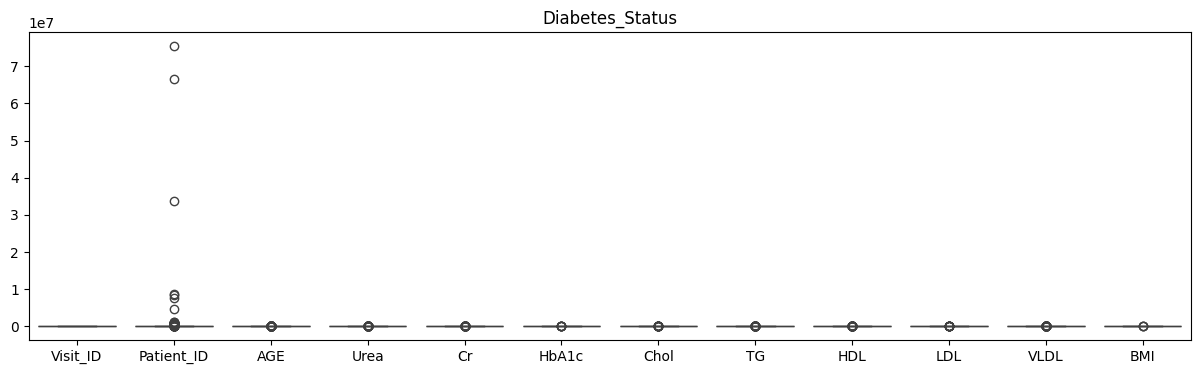

In [11]:
plt.figure(figsize=(15,4))
sns.boxplot(Diabetes_renamed_data)
plt.title('Diabetes_Status')
plt.show()

We can see the patient_ID column have higher outlier in respect to other columns outlier.

In [12]:
Diabetes_renamed_data.isnull().sum()

,0
Visit_ID,0
Patient_ID,0
Gender,3
AGE,1
Urea,1
Cr,2
HbA1c,3
Chol,2
TG,2
HDL,1


In [13]:
Diabetes_new_data = Diabetes_renamed_data.fillna(value= 0, inplace= False)
Diabetes_new_data


,Visit_ID,Patient_ID,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,194,454316,F,57.0,4.1,70.0,9.3,5.3,3.3,1.0,1.4,1.3,29.0,Y
1005,195,4543,F,55.0,4.1,34.0,13.9,5.4,1.6,1.6,3.1,0.7,33.0,Y
1006,249,48822,M,55.0,4.2,57.0,8.9,5.3,3.1,0.7,3.3,1.4,27.0,Y
1007,88,21747,M,41.0,3.8,48.0,4.3,3.2,4.5,1.3,1.8,1.1,21.0,N


In [14]:
Diabetes_mode_data = Diabetes_new_data.fillna(Diabetes_new_data.mode().iloc[0])
Diabetes_mode_data

,Visit_ID,Patient_ID,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,194,454316,F,57.0,4.1,70.0,9.3,5.3,3.3,1.0,1.4,1.3,29.0,Y
1005,195,4543,F,55.0,4.1,34.0,13.9,5.4,1.6,1.6,3.1,0.7,33.0,Y
1006,249,48822,M,55.0,4.2,57.0,8.9,5.3,3.1,0.7,3.3,1.4,27.0,Y
1007,88,21747,M,41.0,3.8,48.0,4.3,3.2,4.5,1.3,1.8,1.1,21.0,N


In [15]:
Diabetes_mode_data.isnull().sum()

,0
Visit_ID,0
Patient_ID,0
Gender,0
AGE,0
Urea,0
Cr,0
HbA1c,0
Chol,0
TG,0
HDL,0


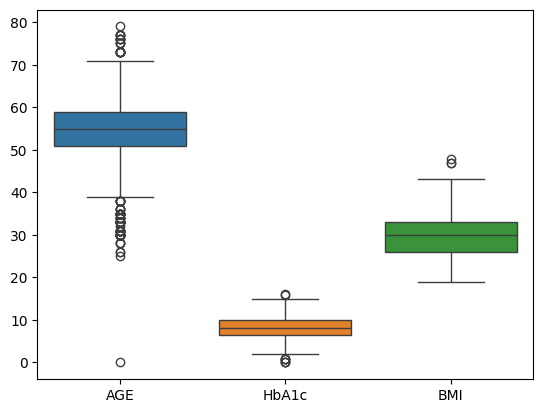

In [16]:
sns.boxplot(Diabetes_mode_data[['AGE', 'HbA1c', 'BMI']])
plt.show()

In [17]:
Diabetes_mode_data.describe().round()

,Visit_ID,Patient_ID,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1009.0,1009.0,1009.0,1009.0,1009.0,1009.0,1009.0,1009.0,1009.0,1009.0,1009.0,1009.0
mean,338.0,271747.0,54.0,5.0,69.0,8.0,5.0,2.0,1.0,3.0,2.0,30.0
std,239.0,3365681.0,9.0,3.0,60.0,3.0,1.0,1.0,1.0,1.0,4.0,5.0
min,1.0,123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0
25%,126.0,24064.0,51.0,4.0,48.0,6.0,4.0,2.0,1.0,2.0,1.0,26.0
50%,294.0,34399.0,55.0,5.0,60.0,8.0,5.0,2.0,1.0,2.0,1.0,30.0
75%,547.0,45391.0,59.0,6.0,73.0,10.0,6.0,3.0,1.0,3.0,2.0,33.0
max,800.0,75435657.0,79.0,39.0,800.0,16.0,10.0,14.0,10.0,10.0,35.0,48.0


In [24]:
Q1 = Diabetes_mode_data[['AGE', 'HbA1c', 'BMI']].quantile(0.25)
Q3 = Diabetes_mode_data[['AGE', 'HbA1c', 'BMI']].quantile(0.75)
IQR = Q3 - Q1
Lower_Bound = Q1 - 1.5 * IQR
Upper_Bound = Q3 + 1.5 * IQR
print('Q1:\n', Q1)
print('Q3:\n', Q3)
print('IQR:\n', IQR)
print('Lower_Bound:\n', Lower_Bound)
print('Upper_Bound:\n', Upper_Bound)

Q1:
 AGE      51.0
HbA1c     6.5
BMI      26.0
Name: 0.25, dtype: float64
Q3:
 AGE      59.0
HbA1c    10.1
BMI      33.0
Name: 0.75, dtype: float64
IQR:
 AGE      8.0
HbA1c    3.6
BMI      7.0
dtype: float64
Lower_Bound:
 AGE      39.0
HbA1c     1.1
BMI      15.5
dtype: float64
Upper_Bound:
 AGE      71.0
HbA1c    15.5
BMI      43.5
dtype: float64


In [25]:
Diabetes_mode_data.shape

(1009, 14)

In [26]:
Cr_value = 0.99
Urea_value = 0.99

In [27]:
Diabetes_filtered_data = Diabetes_mode_data[(Diabetes_mode_data['Cr'] >= Cr_value) & (Diabetes_mode_data['Urea'] >= Urea_value)]
Diabetes_filtered_data

,Visit_ID,Patient_ID,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,194,454316,F,57.0,4.1,70.0,9.3,5.3,3.3,1.0,1.4,1.3,29.0,Y
1005,195,4543,F,55.0,4.1,34.0,13.9,5.4,1.6,1.6,3.1,0.7,33.0,Y
1006,249,48822,M,55.0,4.2,57.0,8.9,5.3,3.1,0.7,3.3,1.4,27.0,Y
1007,88,21747,M,41.0,3.8,48.0,4.3,3.2,4.5,1.3,1.8,1.1,21.0,N


In [28]:
Diabetes_filtered_data.shape

(1005, 14)

In [21]:
from scipy import stats

In [30]:
Diabetes_filtered = Diabetes_filtered_data.copy()

In [31]:
Diabetes_filtered[['Chol', 'TG', 'HDL', 'LDL', 'VLDL']] = stats.zscore(Diabetes_filtered[['Chol', 'TG', 'HDL', 'LDL', 'VLDL']])
Diabetes_filtered

,Visit_ID,Patient_ID,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,-0.496737,-1.030294,1.816160,-1.078429,-0.369702,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,-0.876592,-0.673246,-0.155024,-0.453589,-0.342330,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,-0.496737,-1.030294,1.816160,-1.078429,-0.369702,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,-0.496737,-1.030294,1.816160,-1.078429,-0.369702,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,0.035060,-0.958884,-0.609913,-0.542851,-0.397075,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,194,454316,F,57.0,4.1,70.0,9.3,0.338944,0.683535,-0.306654,-1.078429,-0.150724,29.0,Y
1005,195,4543,F,55.0,4.1,34.0,13.9,0.414915,-0.530427,0.603124,0.439040,-0.314958,33.0,Y
1006,249,48822,M,55.0,4.2,57.0,8.9,0.338944,0.540716,-0.761543,0.617566,-0.123352,27.0,Y
1007,88,21747,M,41.0,3.8,48.0,4.3,-1.256447,1.540449,0.148235,-0.721377,-0.205469,21.0,N


In [32]:
Diabetes_filtered[Diabetes_filtered.duplicated()]

,Visit_ID,Patient_ID,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
1006,249,48822,M,55.0,4.2,57.0,8.9,0.338944,0.540716,-0.761543,0.617566,-0.123352,27.0,Y
1007,88,21747,M,41.0,3.8,48.0,4.3,-1.256447,1.540449,0.148235,-0.721377,-0.205469,21.0,N
1008,62,46059,M,55.0,7.0,56.0,9.1,-0.876592,-0.316198,-0.761543,-0.275063,-0.260213,27.0,Y


In [33]:
removed_duplicate_data = Diabetes_filtered.drop_duplicates(keep= False)
removed_duplicate_data

,Visit_ID,Patient_ID,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,-0.496737,-1.030294,1.816160,-1.078429,-0.369702,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,-0.876592,-0.673246,-0.155024,-0.453589,-0.342330,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,-0.496737,-1.030294,1.816160,-1.078429,-0.369702,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,-0.496737,-1.030294,1.816160,-1.078429,-0.369702,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,0.035060,-0.958884,-0.609913,-0.542851,-0.397075,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,189,454316,M,58.0,4.0,55.0,7.9,0.035060,-0.244789,-0.003395,-1.078429,-0.205469,35.0,Y
1002,192,454316,M,55.0,4.8,88.0,0.0,0.642828,1.183401,-0.458283,0.617566,-0.013863,30.0,Y
1003,193,454316,M,62.0,6.3,82.0,6.7,0.338944,-0.244789,-0.306654,0.796092,-0.506564,30.1,Y
1004,194,454316,F,57.0,4.1,70.0,9.3,0.338944,0.683535,-0.306654,-1.078429,-0.150724,29.0,Y


In [34]:
removed_duplicate_data.shape

(999, 14)

2.	Data Transformation

In [37]:
from sklearn.preprocessing import LabelEncoder
Labelencoder = LabelEncoder()

In [39]:
removed_duplicate_data['encode_gender'] = Labelencoder.fit_transform(removed_duplicate_data['Gender'])
removed_duplicate_data

TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['int', 'str']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
removed_duplicate_data_normalized = Scaler.fit_transform(removed_duplicate_data[['Patient_ID', 'AGE', 'BMI', 'Cr']])
removed_duplicate_data_normalized


array([[2.36652398e-04, 6.32911392e-01, 1.73913043e-01, 5.03778338e-02],
       [4.52015094e-04, 3.29113924e-01, 1.39130435e-01, 7.05289673e-02],
       [6.34342961e-04, 6.32911392e-01, 1.73913043e-01, 5.03778338e-02],
       ...,
       [6.02094233e-03, 7.84810127e-01, 3.86086957e-01, 9.57178841e-02],
       [6.02094233e-03, 7.21518987e-01, 3.47826087e-01, 8.06045340e-02],
       [5.85930763e-05, 6.96202532e-01, 4.86956522e-01, 3.52644836e-02]])

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
removed_duplicate_data_normalized = Scaler.fit_transform(removed_duplicate_data[['Patient_ID', 'AGE', 'BMI', 'Cr']])
removed_duplicate_data_normalized

array([[-0.07550698, -0.3968109 , -1.13110437, -0.38404662],
       [-0.07070151, -3.09045135, -1.33316965, -0.11742913],
       [-0.06663316, -0.3968109 , -1.13110437, -0.38404662],
       ...,
       [ 0.05355998,  0.95000933,  0.10149381,  0.21584274],
       [ 0.05355998,  0.38883423, -0.120778  ,  0.01587962],
       [-0.07948008,  0.1643642 ,  0.68748311, -0.58400973]])

Hence, Standard Scaler follows the normal distribution while Normalization doesn't follows the normal distribution.